# Initial Model Creation

In [5]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

## Creation of Dataset 

In [6]:
def create_df(state, filename):
    df = pd.read_csv(filename)
    df['state'] = state
    return df
        

In [7]:
smiles = ['smile_close.csv', 'smile_1.csv', 'smile_2.csv' ]
neutrals = ['n_close.csv', 'neutral_1.csv', 'neutral_2.csv']
frowns = ['f_close.csv', 'frown_1.csv', 'frown_2.csv']

In [8]:
stated_dfs = []
for smile in smiles:
    stated_dfs.append(create_df(1, "csvs/old/{}".format(smile)))
    

for neutral in neutrals:
    stated_dfs.append(create_df(0, "csvs/old/{}".format(neutral)))
    
for frown in frowns:
    stated_dfs.append(create_df(2,"csvs/old/{}".format(frown)))


## Put it all together

In [9]:
all_df = pd.concat(stated_dfs)

In [10]:
all_df['state'] = all_df['state'].astype('int')
y = np.asarray(all_df['state'])
y [0:5]

array([1, 1, 1, 1, 1])

In [11]:
just_x_df = all_df.drop('state', axis = 1)

In [12]:
just_x_df.head()

,x0,y0,z0,x1,y1,z1,x2,y2,z2,x3,...,z464,x465,y465,z465,x466,y466,z466,x467,y467,z467
0,0.545830,0.524056,-0.029297,0.546287,0.479100,-0.064522,0.546125,0.492963,-0.034046,0.537084,...,-0.005006,0.566337,0.386870,-0.013140,0.630449,0.373922,0.008083,0.636708,0.368261,0.008427
1,0.540818,0.531962,-0.026713,0.542528,0.493206,-0.062420,0.542411,0.504984,-0.032203,0.535252,...,-0.006275,0.566137,0.395106,-0.013939,0.630803,0.378139,0.006460,0.637314,0.372235,0.006693
2,0.540650,0.533919,-0.027271,0.542201,0.496070,-0.062895,0.542208,0.507744,-0.032877,0.535400,...,-0.005099,0.566600,0.398998,-0.012992,0.631385,0.383161,0.007961,0.638079,0.377253,0.008266
3,0.542104,0.531385,-0.029489,0.543360,0.492483,-0.064428,0.543156,0.505391,-0.034443,0.536507,...,-0.004299,0.567261,0.400789,-0.012429,0.631759,0.387164,0.009009,0.638496,0.381668,0.009402
4,0.542159,0.530128,-0.030081,0.543637,0.492219,-0.064291,0.543250,0.505279,-0.034784,0.536629,...,-0.003212,0.566863,0.401099,-0.011296,0.630695,0.388394,0.010466,0.637466,0.382900,0.010949


In [13]:
X = np.asarray(just_x_df)
X[0:5]

array([[ 0.54583007,  0.52405614, -0.02929724, ...,  0.63670802,
         0.3682608 ,  0.00842698],
       [ 0.54081768,  0.5319615 , -0.02671287, ...,  0.63731378,
         0.37223533,  0.00669251],
       [ 0.54065019,  0.53391874, -0.02727062, ...,  0.63807857,
         0.3772532 ,  0.00826608],
       [ 0.54210407,  0.53138489, -0.0294893 , ...,  0.6384961 ,
         0.38166821,  0.00940228],
       [ 0.54215854,  0.53012782, -0.03008097, ...,  0.63746554,
         0.38289958,  0.01094904]])

In [14]:
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler 

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score # Accuracy metrics 
from sklearn.metrics import classification_report, confusion_matrix
import itertools


In [15]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [16]:
from sklearn.model_selection import RepeatedKFold 
kf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None) 
pipelines = {
    'lr':make_pipeline(StandardScaler(), LogisticRegression()),
    'rc':make_pipeline(StandardScaler(), RidgeClassifier()),
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier()),
    'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier()),
}
fit_models = {}

In [17]:
fit_models


{}

In [18]:
train = {}
train['pipeline'] = pipelines['gb']

In [19]:
for train_index, test_index in kf.split(X):
    print("Train:", train_index, "Validation:",test_index)
    X_train, X_test = X[train_index], X[test_index] 
    y_train, y_test = y[train_index], y[test_index]
    for algo, pipeline in train.items():
        model = pipeline.fit(X_train, y_train)
        fit_models[algo] = model

Train: [   0    1    2 ... 3192 3193 3194] Validation: [  11   12   19   27   36   44   57   62   65   70   81   98   99  102
  106  111  118  135  137  140  144  148  158  162  164  169  177  186
  187  190  192  197  208  210  213  216  218  226  229  239  240  248
  264  277  280  282  299  300  306  313  316  326  328  333  344  345
  349  350  354  359  361  364  365  375  379  386  387  394  396  397
  403  409  411  416  418  419  426  431  442  444  454  466  469  476
  480  481  482  490  492  493  494  495  496  498  500  503  504  505
  506  514  517  518  520  527  532  534  536  541  544  552  557  566
  572  585  586  594  598  606  612  613  615  616  640  649  650  652
  656  657  663  665  670  675  681  688  691  696  705  706  708  709
  710  714  717  727  729  731  741  744  753  755  759  769  781  786
  789  792  793  795  797  800  801  815  823  824  826  834  837  847
  848  871  873  880  883  884  888  890  893  898  906  916  918  920
  930  932  933  951  

Train: [   0    1    2 ... 3191 3192 3194] Validation: [   7    8   10   18   24   34   42   51   54   66   69   74   83   88
   91  104  105  116  117  121  125  126  127  129  131  133  138  142
  152  157  160  163  167  171  205  211  214  219  221  225  231  232
  234  241  242  247  257  261  266  268  269  272  275  278  287  288
  289  303  304  311  314  318  319  330  332  338  342  346  348  351
  353  362  367  371  380  388  390  398  399  402  406  407  420  422
  423  432  437  447  448  456  464  471  472  486  508  512  515  519
  523  525  533  537  543  555  556  564  568  569  571  577  578  580
  583  587  589  590  599  602  614  617  618  620  621  625  627  629
  636  641  642  646  653  660  661  667  679  680  683  684  687  698
  702  712  713  719  720  721  733  737  742  750  752  756  757  758
  770  772  775  779  780  784  790  814  830  831  833  838  839  849
  850  864  867  877  878  894  896  899  903  905  907  910  913  914
  915  922  924  925  

Train: [   0    1    2 ... 3191 3192 3193] Validation: [  10   36   40   45   48   49   53   57   62   72   77   79   81   82
   87   89   90   98   99  100  111  113  120  121  123  132  138  151
  152  153  155  167  169  170  177  192  197  200  203  213  219  225
  229  230  241  244  249  259  261  263  271  273  274  280  281  289
  300  302  312  313  315  327  331  332  333  336  338  342  343  347
  350  361  369  373  380  385  388  398  401  430  435  443  445  454
  469  473  476  477  483  485  486  487  488  493  496  501  503  510
  514  527  539  543  549  550  552  554  558  564  567  568  569  572
  573  593  595  597  603  606  608  611  613  615  626  629  631  635
  646  659  662  664  670  671  673  677  680  698  700  703  704  713
  725  727  728  731  732  741  742  745  746  747  753  754  755  757
  759  761  769  778  785  786  794  802  805  810  815  829  836  837
  839  840  841  842  850  856  861  863  865  869  872  875  885  886
  887  890  891  894  

Train: [   1    2    3 ... 3192 3193 3194] Validation: [   0    6   12   15   18   20   31   32   34   38   43   50   55   56
   64   65   66   68   69   71   85   86   91   97  102  103  104  105
  106  110  114  116  119  122  126  131  142  145  146  156  158  163
  181  185  187  189  191  195  208  211  216  220  228  234  238  243
  247  252  253  254  269  275  278  282  291  299  301  305  306  307
  308  318  320  321  323  324  325  330  341  346  348  351  353  356
  357  358  362  363  368  389  390  391  394  400  403  405  411  413
  414  420  422  425  427  428  429  431  439  446  450  455  458  464
  466  468  470  489  495  497  505  506  509  513  516  522  525  532
  534  537  540  544  571  576  580  582  585  587  591  598  610  614
  617  624  625  627  630  632  637  638  639  641  642  650  651  652
  656  660  672  679  687  696  697  702  706  707  708  709  712  716
  721  724  733  738  739  748  760  764  771  772  776  777  779  792
  793  796  809  812  

Train: [   0    2    3 ... 3192 3193 3194] Validation: [   1    8    9   12   20   24   26   41   59   60   62   69   73   74
   76   77   89   90   91   95   97  106  108  115  116  122  123  134
  136  139  145  151  152  153  159  160  161  166  173  174  175  181
  187  193  199  207  208  210  224  227  228  232  240  248  250  255
  257  265  271  274  277  282  286  295  301  303  307  311  316  322
  325  326  328  338  344  350  354  361  364  379  385  392  396  402
  404  405  415  419  420  429  438  444  450  465  468  471  474  480
  482  486  488  492  494  498  506  507  508  510  511  512  515  516
  518  519  545  546  553  561  567  568  573  574  577  586  590  593
  595  602  604  608  612  613  616  618  630  631  639  643  648  652
  656  670  671  678  693  700  710  712  715  717  718  730  731  735
  749  754  758  760  761  763  766  768  782  784  786  787  791  792
  797  799  800  803  812  814  819  826  828  843  845  846  851  852
  855  858  861  868  

Train: [   0    1    4 ... 3191 3193 3194] Validation: [   2    3    7    9   11   16   20   22   26   34   56   60   62   66
   85   89   97   98  102  105  109  115  117  122  124  128  129  131
  136  138  141  154  157  167  168  181  186  187  191  197  205  208
  217  221  222  225  232  237  240  242  245  252  262  263  280  283
  285  288  289  295  297  305  309  323  325  327  328  332  344  345
  356  360  366  368  378  380  382  385  387  392  402  405  407  408
  417  419  422  429  435  443  447  453  459  460  461  468  473  474
  477  479  482  485  487  492  496  500  513  521  528  531  539  542
  547  551  553  562  565  575  577  591  615  617  624  626  636  638
  644  650  652  654  655  656  658  662  668  671  675  689  695  696
  707  711  719  723  725  730  731  741  745  750  757  768  777  778
  779  781  790  793  794  795  804  810  812  816  819  821  827  828
  840  846  847  851  853  855  858  859  875  876  879  885  887  888
  897  900  906  907  

Train: [   0    2    3 ... 3191 3192 3193] Validation: [   1    8   12   21   24   31   33   38   44   47   50   59   61   65
   72   73   92   93  101  104  106  110  116  120  140  146  152  162
  175  185  196  200  201  207  212  215  216  223  228  233  243  246
  247  260  264  270  271  273  276  279  282  290  293  296  308  311
  314  317  318  324  335  336  340  342  347  350  355  357  359  363
  364  371  372  373  374  377  389  396  411  420  439  442  445  449
  452  455  457  462  463  465  472  481  484  490  493  499  501  505
  512  517  518  523  540  544  545  546  548  563  564  566  569  573
  576  581  590  592  596  607  608  612  613  619  635  640  642  647
  666  672  679  683  690  691  702  710  712  713  715  716  726  729
  732  733  734  736  737  738  755  759  761  762  770  788  792  798
  799  801  811  813  822  825  826  830  832  833  844  850  866  868
  869  873  884  886  890  891  892  895  903  905  910  914  916  923
  925  930  931  932  

Train: [   0    4    5 ... 3191 3193 3194] Validation: [   1    2    3    6   11   21   34   41   48   51   52   56   60   61
   70   77   79   81   82   89   96   97  106  109  113  115  121  122
  127  131  133  140  146  148  155  164  169  174  176  183  188  221
  225  226  230  238  241  247  249  250  259  263  266  268  286  287
  289  296  315  322  328  346  349  355  363  367  368  370  371  372
  373  375  376  381  383  385  392  395  398  405  407  417  421  427
  429  430  436  445  446  449  452  455  456  461  462  466  477  479
  482  483  494  496  498  503  511  516  524  530  538  539  540  546
  558  565  566  572  576  577  580  584  590  591  592  594  598  602
  609  610  617  626  628  631  632  646  651  652  663  668  671  673
  685  697  701  703  707  714  716  720  723  728  739  740  748  749
  763  768  774  777  784  787  796  801  812  820  825  829  831  833
  835  839  841  846  850  853  854  855  858  863  864  865  867  868
  870  878  881  883  

Train: [   0    1    2 ... 3191 3192 3193] Validation: [  19   26   33   36   44   49   55   57   58   59   64   65   66   67
   68   69   71   80   85   86   87   90   93   99  100  104  107  114
  123  128  129  137  138  144  147  149  158  162  178  189  192  194
  196  197  200  205  211  214  224  228  229  232  242  243  245  255
  256  262  267  269  272  276  278  279  285  288  290  298  299  307
  309  311  312  317  327  332  336  337  340  342  348  352  360  361
  364  374  378  384  387  390  391  394  399  401  409  412  414  426
  431  434  438  443  450  451  453  457  478  484  493  512  513  519
  521  523  526  528  536  543  547  551  552  556  559  568  574  578
  586  593  595  599  603  615  616  618  620  630  634  635  636  643
  645  649  656  666  675  688  690  695  699  704  710  713  722  725
  735  737  744  750  752  754  757  758  759  760  776  788  791  793
  795  797  798  806  811  826  828  843  852  856  866  871  887  890
  900  902  906  908  

Train: [   0    1    2 ... 3192 3193 3194] Validation: [   4    7    9   14   17   19   20   43   44   47   49   66   69   73
   75   78   86   90   91   95   99  100  106  107  119  124  125  126
  128  129  140  145  146  151  156  164  166  174  186  189  195  197
  200  203  207  213  220  223  225  231  232  233  246  255  270  275
  279  284  289  295  305  315  319  321  322  323  324  333  341  345
  348  350  352  353  356  362  367  371  372  373  378  380  382  384
  388  390  392  397  400  407  413  414  415  434  435  437  447  450
  455  457  458  464  467  471  472  474  481  505  507  511  514  518
  530  531  532  534  540  548  550  556  566  567  568  571  578  581
  583  584  593  594  596  601  607  611  615  620  626  628  648  661
  663  666  676  678  682  685  687  695  696  702  703  709  714  716
  732  734  735  737  742  744  747  757  759  765  768  773  775  777
  779  792  793  802  809  814  819  825  829  836  840  846  848  850
  857  862  867  880  

Train: [   0    2    3 ... 3190 3193 3194] Validation: [   1    5   14   19   28   34   36   37   38   39   46   49   51   57
   59   70   74   75   76   83   84   85   93   94   96  103  104  111
  119  130  142  144  145  149  150  160  167  169  171  173  176  181
  182  191  196  200  209  210  211  213  217  220  227  228  243  245
  248  250  252  262  269  271  274  275  287  293  300  302  305  307
  309  310  312  316  319  322  334  335  338  339  342  350  352  362
  363  372  378  379  380  381  382  386  398  418  420  422  430  431
  434  437  438  456  461  467  469  471  473  477  498  501  509  520
  522  527  528  532  535  542  543  550  572  576  580  584  586  589
  597  601  603  609  612  621  622  624  626  638  643  648  652  666
  668  674  678  681  685  696  699  701  702  708  715  717  722  725
  727  728  731  747  757  794  800  802  803  808  809  816  817  824
  834  836  837  843  850  854  856  860  861  862  866  867  893  897
  902  913  934  937  

Train: [   0    1    2 ... 3192 3193 3194] Validation: [   3    7    8   23   29   32   41   45   47   64   65   69   72   78
   92   99  102  105  107  113  120  121  128  132  139  148  154  157
  159  172  192  194  195  197  198  199  201  202  212  214  216  219
  221  224  225  240  246  249  255  256  257  259  260  263  265  276
  278  280  281  288  289  295  301  303  317  332  336  351  355  356
  357  374  392  393  394  395  399  400  401  411  412  415  426  428
  429  432  436  442  445  448  450  452  454  458  460  466  482  483
  486  489  499  503  510  515  526  533  534  537  539  545  546  551
  555  561  562  564  575  577  587  591  599  602  607  610  613  615
  616  617  618  625  629  631  636  653  655  659  660  669  670  673
  677  689  693  698  705  706  707  710  711  713  723  732  734  736
  738  741  749  755  756  760  762  764  769  770  775  777  782  783
  784  787  791  804  807  820  827  832  835  838  845  846  847  849
  851  852  859  865  

Train: [   0    1    3 ... 3190 3191 3193] Validation: [   2    5    8    9   12   15   18   25   34   35   41   44   46   48
   55   56   59   69   77   78   84  100  101  104  106  108  109  115
  116  118  120  125  128  130  140  148  156  162  165  169  170  171
  176  189  190  197  198  201  203  208  221  231  236  238  249  250
  254  257  261  266  269  284  294  295  296  301  304  324  326  330
  331  335  353  357  359  361  367  370  389  395  397  399  400  433
  442  443  447  450  452  453  454  456  457  465  474  481  484  495
  509  510  516  521  525  528  529  531  533  539  544  550  552  555
  559  565  567  572  578  579  586  587  588  591  614  628  629  640
  641  648  650  661  664  683  686  689  691  692  693  700  704  705
  706  715  721  727  734  735  736  742  743  750  758  760  761  765
  794  795  798  811  836  840  844  845  851  855  857  858  861  868
  870  876  877  878  879  881  882  883  884  887  896  901  910  915
  916  920  921  923  

Train: [   0    1    2 ... 3192 3193 3194] Validation: [  11   26   27   31   37   47   50   52   61   64   66   67   75   86
   87   89   90   97   98   99  102  103  105  107  114  126  127  131
  132  147  152  166  179  181  182  184  186  188  206  209  216  226
  227  233  235  241  251  260  265  267  273  275  276  282  297  305
  310  312  313  314  316  318  320  322  333  336  340  346  350  369
  372  379  383  386  396  414  426  434  435  437  445  448  459  461
  467  469  476  479  489  492  494  499  501  514  517  520  532  534
  537  542  543  547  548  549  551  554  564  570  580  583  585  596
  598  609  615  618  620  626  636  642  644  652  657  663  673  679
  680  681  687  695  698  701  707  708  712  729  730  732  737  739
  741  744  751  764  766  768  769  772  777  778  779  783  789  800
  805  808  809  812  813  815  816  818  822  834  849  852  864  871
  885  898  922  928  929  935  959  971  973  974  981  990  997  998
 1001 1007 1012 1013 1

Train: [   0    1    2 ... 3190 3191 3193] Validation: [   5    7   11   23   27   30   32   35   40   43   47   48   63   68
   73   84   98   99  100  102  109  112  118  124  146  150  155  164
  165  166  177  184  185  189  193  201  206  211  220  242  245  246
  250  261  268  270  274  277  281  292  295  303  308  316  335  338
  343  347  356  364  365  369  373  376  381  382  385  398  406  416
  419  420  422  425  433  437  444  445  461  465  466  469  472  477
  481  484  489  504  514  519  528  529  533  539  541  550  555  559
  560  563  570  571  573  576  579  583  584  585  588  589  599  603
  611  612  613  616  627  633  651  653  658  660  662  668  670  672
  678  689  692  694  697  702  712  716  724  725  744  745  753  757
  759  766  767  774  778  783  787  793  806  811  813  815  818  829
  833  836  855  868  869  876  884  892  896  900  901  909  911  920
  934  937  938  944  945  953  955  957  958  972  986  992  996  997
  999 1002 1007 1017 1

Train: [   0    1    2 ... 3192 3193 3194] Validation: [   3    4   14   20   24   30   37   39   53   55   57   58   60   65
   78   88   89   90   91   93   97  102  106  114  125  132  136  137
  138  139  141  142  144  150  154  159  163  172  183  184  190  194
  197  199  205  206  213  216  226  230  240  243  251  255  262  271
  273  282  283  284  286  289  293  301  304  306  314  317  319  320
  322  323  330  335  338  345  347  349  350  360  365  370  383  392
  397  402  404  406  407  408  414  416  420  427  434  446  455  458
  461  468  471  474  479  482  486  487  491  498  507  508  509  515
  518  527  528  531  534  544  552  554  563  573  588  590  595  599
  600  601  602  603  606  611  632  636  639  640  643  654  655  672
  673  676  677  683  692  693  697  704  713  721  725  732  737  746
  747  758  759  770  776  788  793  794  798  800  801  803  810  812
  813  815  819  820  825  827  832  840  844  847  848  851  853  855
  856  865  868  872  

Train: [   0    1    2 ... 3190 3191 3192] Validation: [   7    9   12   28   33   43   47   48   51   56   59   66   67   82
   87   94   98  101  107  110  112  117  129  134  143  148  149  157
  166  173  175  178  187  188  189  198  222  223  233  235  241  242
  256  258  272  274  276  291  292  315  316  318  327  328  329  331
  333  348  355  358  361  368  372  375  390  391  396  399  400  417
  424  429  430  439  444  451  452  462  463  464  466  469  478  481
  485  490  503  505  512  514  516  517  519  523  525  526  538  542
  546  555  556  560  567  569  572  582  584  587  592  597  605  610
  617  623  624  627  630  638  644  646  650  664  665  670  674  680
  681  686  687  703  705  706  709  710  711  719  722  727  728  731
  733  738  742  745  751  761  763  765  768  771  772  773  781  784
  789  791  792  795  797  802  806  822  824  826  837  838  842  843
  845  846  852  857  860  879  887  889  890  895  896  902  905  916
  924  930  937  940  

In [20]:
test = {}

test['gb'] = fit_models['pipeline']


# lr = {}
# lr['lr'] = fit_models['lr']

# rc = {}
# rc['rc'] = fit_models['rc']

# rf = {}
# rf['rf'] = fit_models['rf']

## Model

gb 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       155
           1       1.00      1.00      1.00       216
           2       1.00      1.00      1.00       268

   micro avg       1.00      1.00      1.00       639
   macro avg       1.00      1.00      1.00       639
weighted avg       1.00      1.00      1.00       639

Confusion matrix, without normalization
[[155   0   0]
 [  0 216   0]
 [  0   0 268]]
gb 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       170
           1       1.00      1.00      1.00       233
           2       1.00      1.00      1.00       236

   micro avg       1.00      1.00      1.00       639
   macro avg       1.00      1.00      1.00       639
weighted avg       1.00      1.00      1.00       639

Confusion matrix, without normalization
[[170   0   0]
 [  0 233   0]
 [  0   0 236]]
gb 1.0
              precision    recall  f1-score  

gb 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       175
           1       1.00      1.00      1.00       217
           2       1.00      1.00      1.00       247

   micro avg       1.00      1.00      1.00       639
   macro avg       1.00      1.00      1.00       639
weighted avg       1.00      1.00      1.00       639

Confusion matrix, without normalization
[[175   0   0]
 [  0 217   0]
 [  0   0 247]]
gb 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       179
           1       1.00      1.00      1.00       216
           2       1.00      1.00      1.00       244

   micro avg       1.00      1.00      1.00       639
   macro avg       1.00      1.00      1.00       639
weighted avg       1.00      1.00      1.00       639

Confusion matrix, without normalization
[[179   0   0]
 [  0 216   0]
 [  0   0 244]]
gb 1.0


c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       170
           1       1.00      1.00      1.00       226
           2       1.00      1.00      1.00       243

   micro avg       1.00      1.00      1.00       639
   macro avg       1.00      1.00      1.00       639
weighted avg       1.00      1.00      1.00       639

Confusion matrix, without normalization
[[170   0   0]
 [  0 226   0]
 [  0   0 243]]
gb 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       137
           1       1.00      1.00      1.00       218
           2       1.00      1.00      1.00       284

   micro avg       1.00      1.00      1.00       639
   macro avg       1.00      1.00      1.00       639
weighted avg       1.00      1.00      1.00       639

Confusion matrix, without normalization
[[137   0   0]
 [  0 218   0]
 [  0   0 284]]
gb 1.0
              precision    recall  f1-score   suppor

gb 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       186
           1       1.00      1.00      1.00       198
           2       1.00      1.00      1.00       255

   micro avg       1.00      1.00      1.00       639
   macro avg       1.00      1.00      1.00       639
weighted avg       1.00      1.00      1.00       639

Confusion matrix, without normalization
[[186   0   0]
 [  0 198   0]
 [  0   0 255]]
gb 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       159
           1       1.00      1.00      1.00       218
           2       1.00      1.00      1.00       262

   micro avg       1.00      1.00      1.00       639
   macro avg       1.00      1.00      1.00       639
weighted avg       1.00      1.00      1.00       639

Confusion matrix, without normalization
[[159   0   0]
 [  0 218   0]
 [  0   0 262]]
gb 1.0
              precision    recall  f1-score  

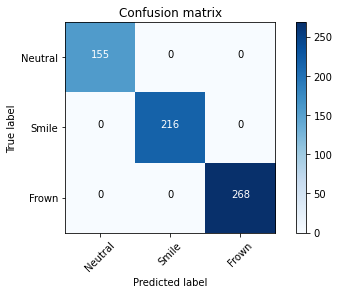

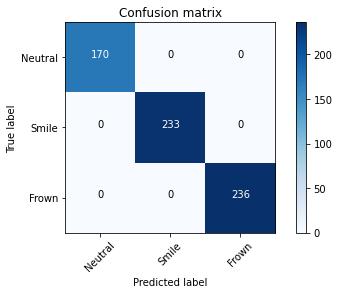

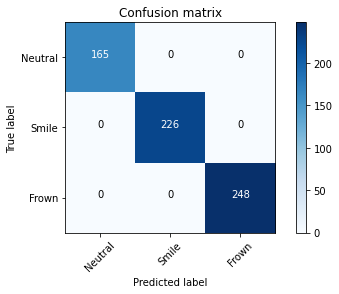

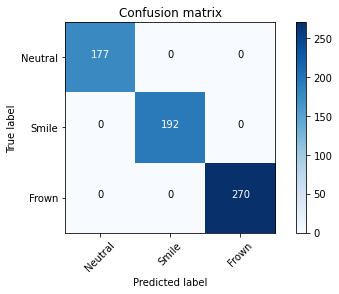

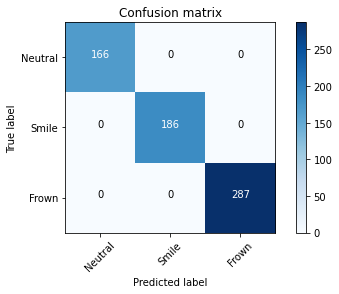

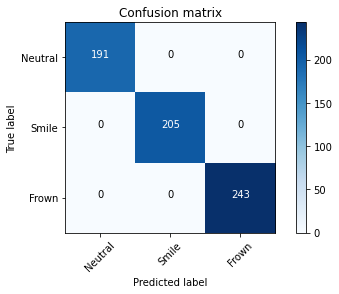

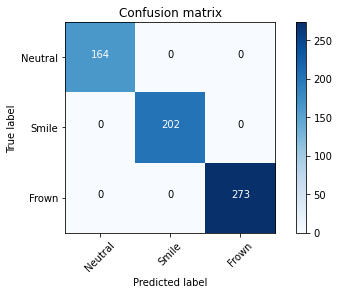

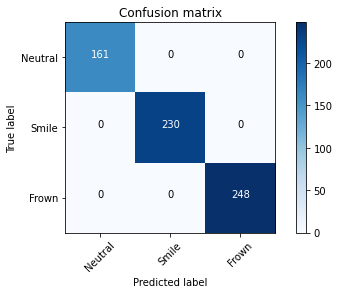

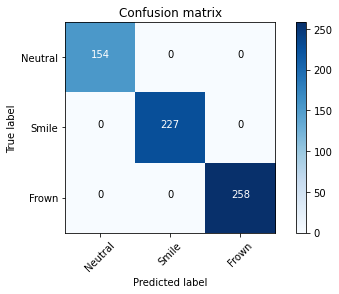

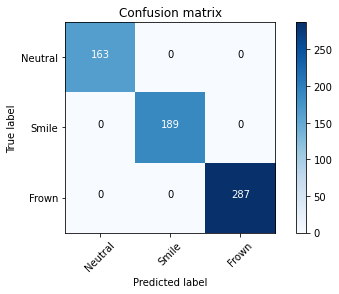

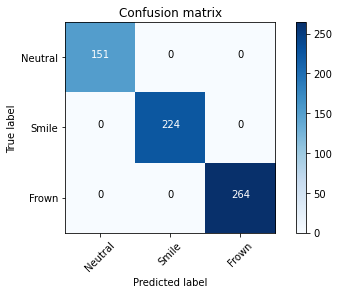

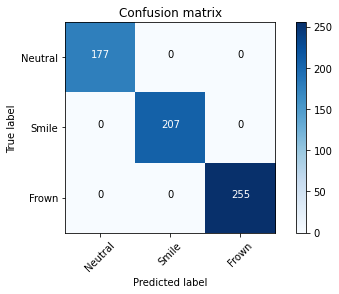

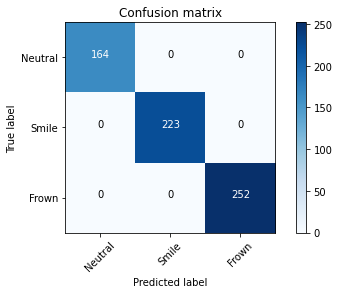

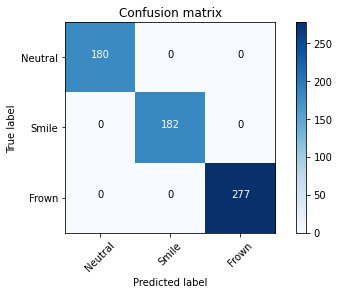

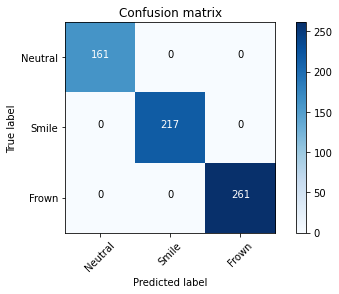

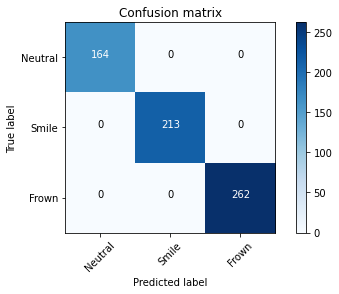

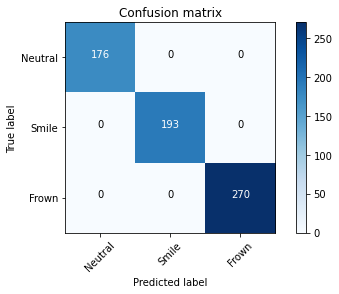

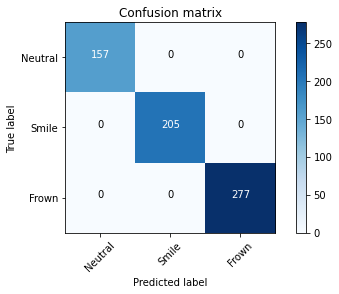

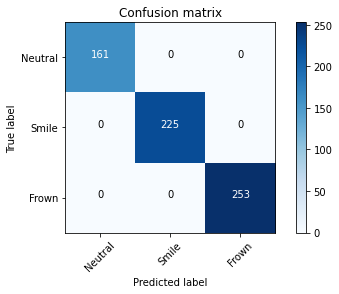

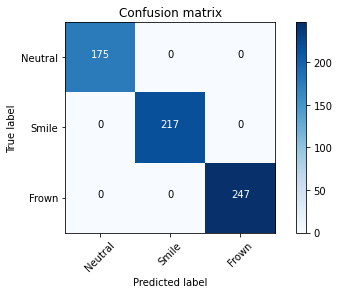

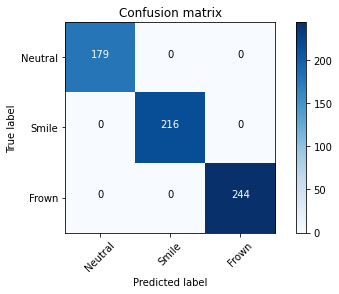

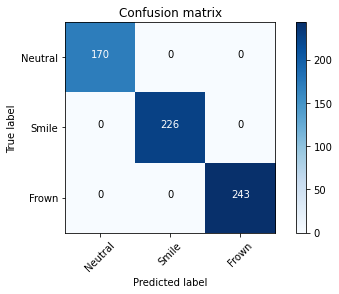

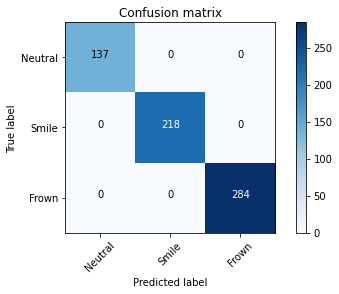

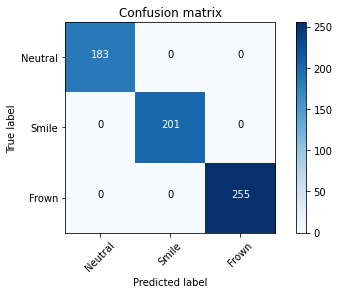

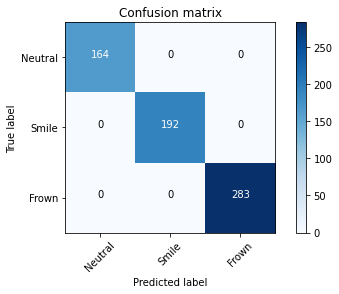

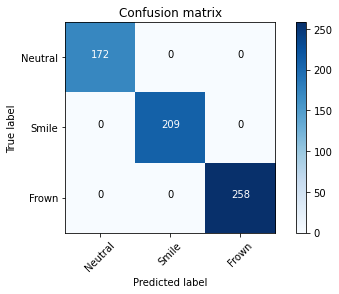

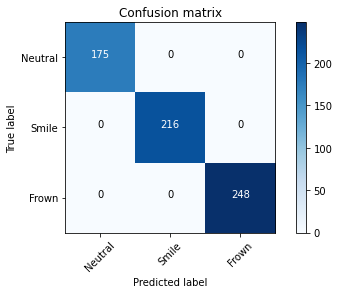

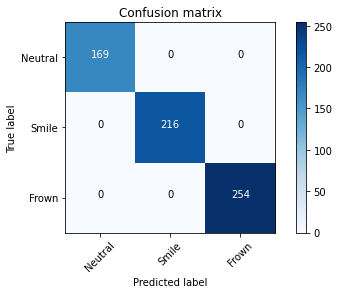

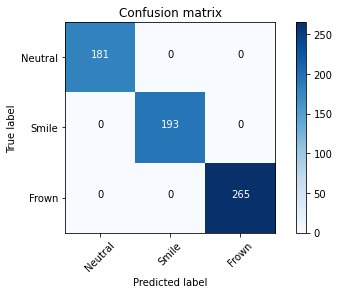

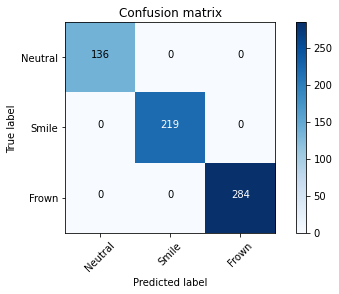

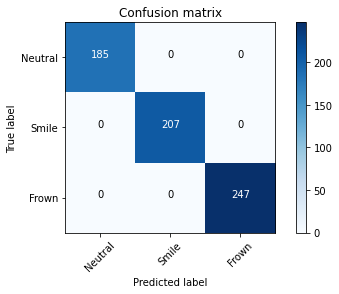

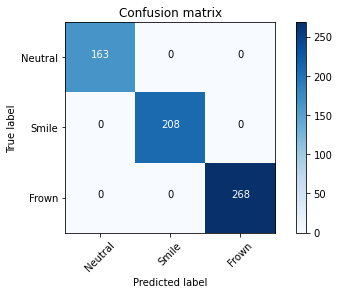

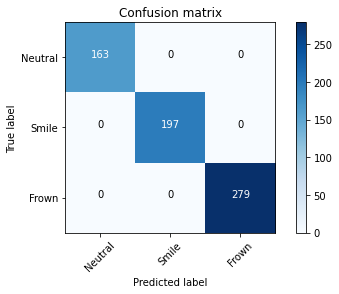

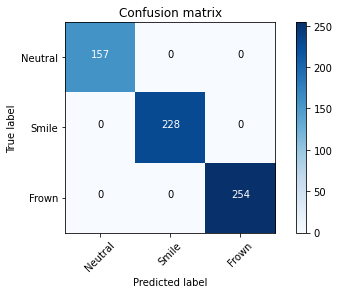

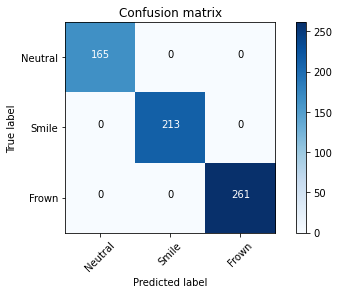

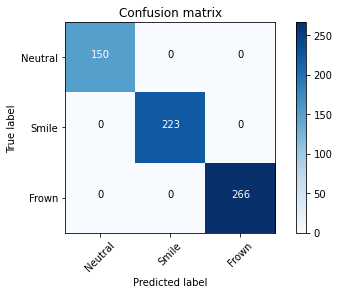

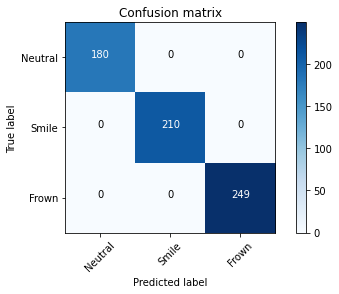

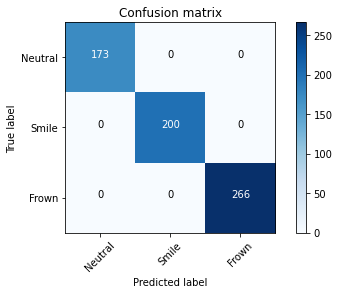

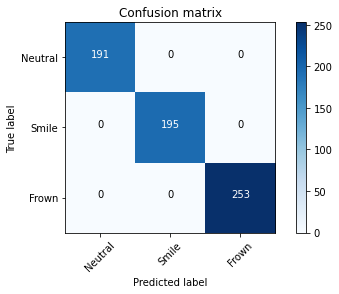

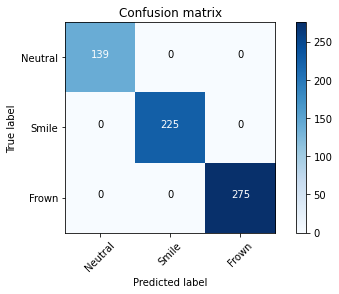

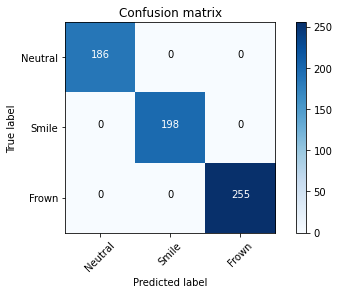

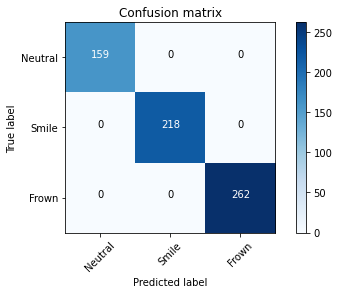

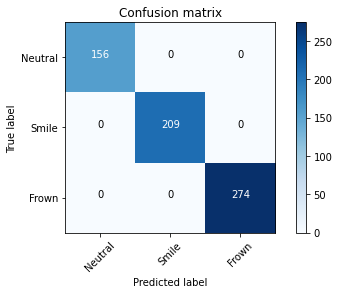

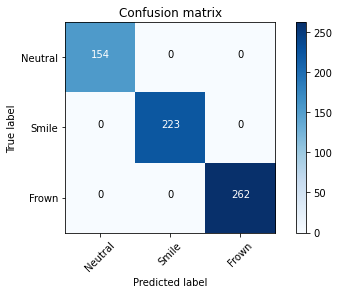

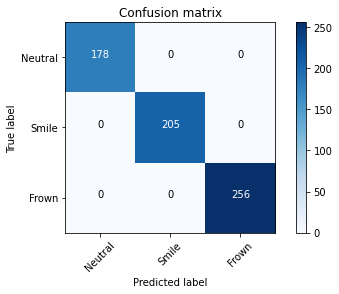

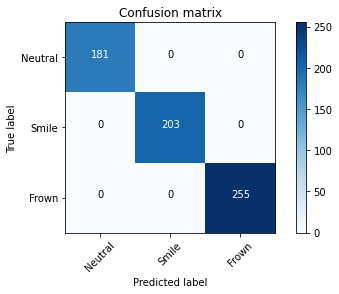

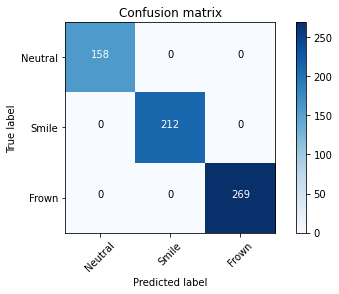

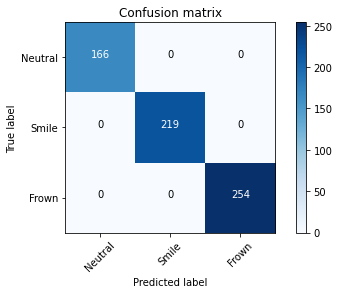

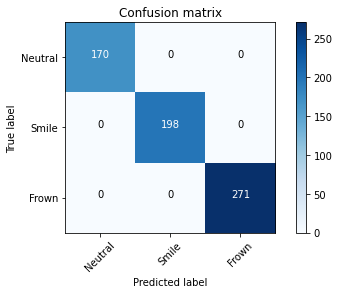

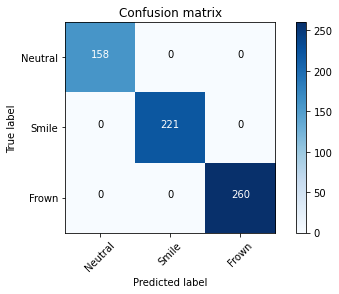

In [21]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index] 
    y_train, y_test = y[train_index], y[test_index]

    for algo, model in test.items():
        
        yhat = model.predict(X_test)
        print(algo, accuracy_score(y_test, yhat))
        # Compute confusion matrix
        cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1,2])
        np.set_printoptions(precision=2)

        print (classification_report(y_test, yhat))

        # Plot non-normalized confusion matrix
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=['Neutral','Smile', 'Frown'],normalize= False,  title='Confusion matrix')


In [26]:
import pickle
with open('neutral_frown_smile_3.pkl', 'wb') as f:
    pickle.dump(test['gb'], f)

In [27]:
with open('neutral_frown_smile_3.pkl', 'rb') as f:
    model = pickle.load(f)

In [29]:
import cv2
import mediapipe
import numpy as np
import csv
cap = cv2.VideoCapture(0)

# facemesh

faceModule = mediapipe.solutions.face_mesh
mp_drawing = mediapipe.solutions.drawing_utils # Drawing helpers

circleDrawingSpec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1, color=(0,255,0))
lineDrawingSpec = mp_drawing.DrawingSpec(thickness=1, color=(0,255,0))
 
with faceModule.FaceMesh(min_detection_confidence=0.5, min_tracking_confidence=0.5) as face:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False        
        
        # Make Detections
        results = face.process(image)
        #print(results.face_landmarks)
        
        # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        
        # Recolor image back to BGR for rendering
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # 1. Draw face landmarks
        if results.multi_face_landmarks != None:
            for faceLandmarks in results.multi_face_landmarks:
                point_values = []

                for i in range(0, 468):
                    pt1 = faceLandmarks.landmark[i]

                    point_values.append(pt1.x)
                    point_values.append(pt1.y)
                    point_values.append(pt1.z)
                
                
                 # Make Detections
                X = pd.DataFrame([point_values])
                body_language_class = model.predict(X)[0]
                print(body_language_class)
                
                mp_drawing.draw_landmarks(image, faceLandmarks, faceModule.FACEMESH_CONTOURS, circleDrawingSpec, lineDrawingSpec)
 

                # Display Class
                cv2.putText(image, 'CLASS'
                            , (95,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
                cv2.putText(image, str(body_language_class)
                            , (90,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
        cv2.imshow('Raw Webcam Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

0
0
0
0
0
0
0
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
2
2
2
2
0
0
0
0
0
0
0
0
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
2
2
2
2
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
1
1
2
2
2
2
2
2
1
2
1
2
2
2
2
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
2
2
2
2
2
2
1
2
2
2
2
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
